In [1]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

In [23]:
#model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
model_type = "DPT-SWIN2-T-256"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.load('./dpt_levit_224.pt', map_location=torch.device('cpu'))
#midas = torch.hub.load("intel-isl/MiDaS", model_type)

In [24]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'to'

In [14]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\damem/.cache\torch\hub\intel-isl_MiDaS_master


In [19]:
img = cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).cpu()

In [20]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

TypeError: 'collections.OrderedDict' object is not callable

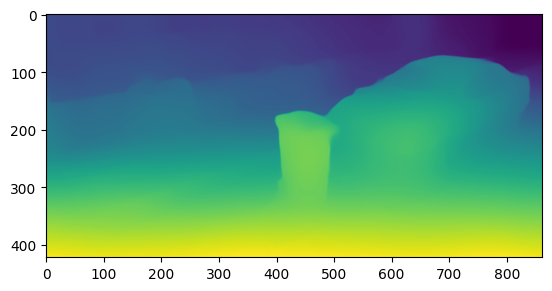

In [20]:
plt.imshow(output)

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_batch = transform(img).to(device)
    
    with torch.no_grad():
        prediction = midas(input_batch)

        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    output = prediction.cpu().numpy()
    cv2.imshow("CV2Frame", output)
    plt.pause(0.00001)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()